In [1]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif

Automatically created module for IPython interactive environment



Bad key "text.kerning_factor" on line 4 in
C:\Users\iowahawk89\miniconda3\envs\ds_tensorflow\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
#prepare data
# #############################################################################
# Import some data to play with

# The iris dataset
X, y = load_iris(return_X_y=True)

# Some noisy data not correlated
E = np.random.RandomState(42).uniform(0, 0.1, size=(X.shape[0], 20))

# Add the noisy data to the informative features
X = np.hstack((X, E))

# Split dataset to select feature and evaluate the classifier
X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, random_state=0
)

plt.figure(1)
plt.clf()
X_indices = np.arange(X.shape[-1])

<Figure size 432x288 with 0 Axes>

Classification accuracy without selecting features: 0.789


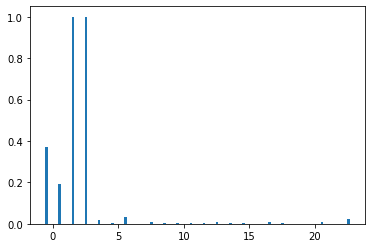

In [3]:
# #############################################################################
# Univariate feature selection with F-test for feature scoring
# We use the default selection function to select the four
# most significant features
selector = SelectKBest(f_classif, k=4)
selector.fit(X_train, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)')

# #############################################################################
# Compare to the weights of an SVM
clf = make_pipeline(MinMaxScaler(), LinearSVC())
clf.fit(X_train, y_train)

print('Classification accuracy without selecting features: {:.3f}'
      .format(clf.score(X_test, y_test)))


<BarContainer object of 24 artists>

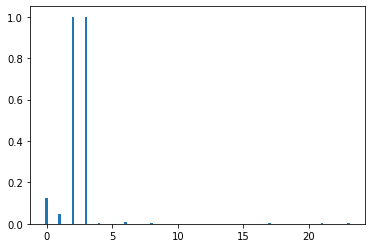

In [22]:
scores = selector.scores_
scores /= scores.max()
plt.bar(X_indices, scores, width=.2)

In [5]:
mask = selector.get_support()

In [14]:
print(mask)

[ True  True  True  True False False False False False False False False
 False False False False False False False False False False False False]


In [15]:
mask.shape

(24,)

In [16]:
X_train.shape

(112, 24)

Automatically created module for IPython interactive environment



Bad key "text.kerning_factor" on line 4 in
C:\Users\iowahawk89\miniconda3\envs\ds_tensorflow\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


Classification accuracy without selecting features: 0.789
Classification accuracy after univariate feature selection: 0.868


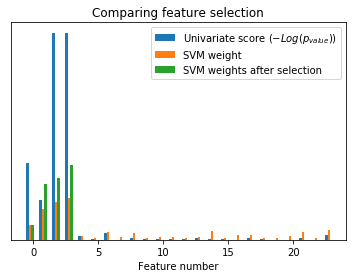

In [1]:
svm_weights = np.abs(clf[-1].coef_).sum(axis=0)
svm_weights /= svm_weights.sum()

plt.bar(X_indices - .25, svm_weights, width=.2, label='SVM weight')

clf_selected = make_pipeline(
        SelectKBest(f_classif, k=4), MinMaxScaler(), LinearSVC()
)
clf_selected.fit(X_train, y_train)
print('Classification accuracy after univariate feature selection: {:.3f}'
      .format(clf_selected.score(X_test, y_test)))

svm_weights_selected = np.abs(clf_selected[-1].coef_).sum(axis=0)
svm_weights_selected /= svm_weights_selected.sum()

plt.bar(X_indices[selector.get_support()] - .05, svm_weights_selected,
        width=.2, label='SVM weights after selection')


plt.title("Comparing feature selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()